# Human Resources Analytics (Simulated) Dataset

Source:  
https://www.kaggle.com/ludobenistant/hr-analytics
  
  
Sections:  
* [Reading in data and early data exploration](#Reading-in-data-and-early-data-exploration)
* [Cleaning-up/pre-processing-and-feature-engineering](#Cleaning-up/pre-processing-and-feature-engineering...)
* [Modeling](#Modeling)

## Reading in data and early data exploration

In [108]:
#imports
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#import datatime

%matplotlib inline

Let's read in the data and see what we're working with:

In [3]:
df = pd.read_csv('../data/HR-data-01.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Let's look at some of the variables to see what they mean, how they're measuring, and/or what kinds of variables they are.

In [6]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

So it looks like for `left`, 1 means they left and 0 means they're still at the company.

In [7]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

`satisfaction_level` seems to be a value from 0.09 to 1.00 (or none of the entries gave it a 0.00 score).

In [8]:
type(df['satisfaction_level'])

pandas.core.series.Series

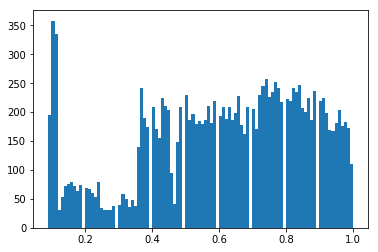

In [9]:
plt.hist(df['satisfaction_level'], bins=100);

In [11]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

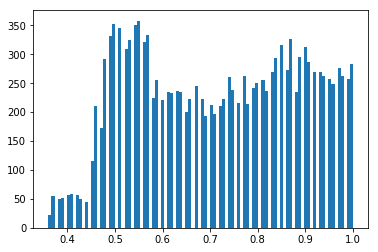

In [12]:
plt.hist(df['last_evaluation'], bins=100);

`last_evalution` seems to be another variable between 0.36 and 1.00. So I'm not sure what this means? For now, I'll take it as a just a relative amount of time.

In [13]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

So `sales` is the kind of department the person worked in. I'll come back to this later...

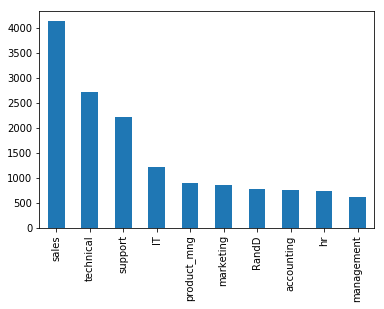

In [14]:
df['sales'].value_counts().plot(kind='bar')

In [15]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

So `number_project` could be number of projects worked on through-out her/his time spent at the company, or the number or projects they're currently working on. I'll assume it's the former.

In [16]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [17]:
tsc = df['time_spend_company'].value_counts().copy()
#tsc_zeros = pd.Series(np.zeros(2), index=[1,9]) # this changes it to float
tsc_zeros = pd.Series([0,0], index=[1,9])
tsc = tsc.append(tsc_zeros).sort_index(axis=0).copy()
tsc

1        0
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
9        0
10     214
dtype: int64

Perhaps `time_spend_company` means the years spent working here?

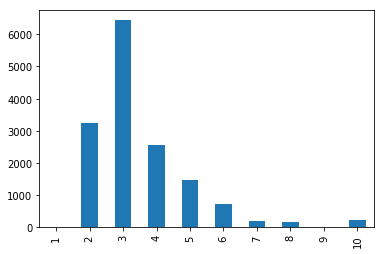

In [18]:
#plt.hist(tsc, bins=10, align='left', rwidth=0.5);
#plt.bar(tsc, rwidth=0.5);
tsc.plot.bar();

In [19]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [20]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

`Work_accident` appears to be a boolean value, and I'm assuming 0 is no accident, and 1 is accident.

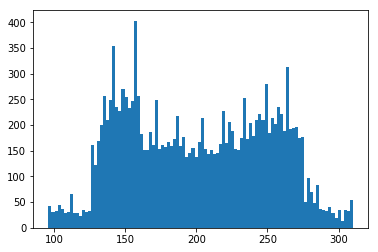

In [22]:
plt.hist(df['average_montly_hours'], bins=100);

In [23]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Not a lot of `promotion_last_5years`, here... :(

## Cleaning up/pre-processing and feature engineering...

`salary` has three categorical variables, but instead of using dummy variables, we'll just change them to numerical.

In [24]:
def impute_salary(s):
    if (s == 'low') or (s == 1):
        return 1
    if (s == 'medium') or (s == 2):
        return 2
    if (s == 'high') or (s == 3):
        return 3
    else:
        return -1
    
df['salary'] = df['salary'].apply(lambda x: impute_salary(x))
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

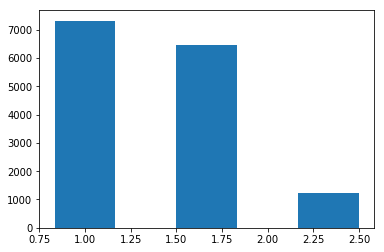

In [25]:
plt.hist(df['salary'], bins=3, align='left',rwidth=0.5);

`sales` actually is a categorical variable that seems to indicate department the person worked/s in. Let's first just change the name to something more fitting.

In [26]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary']

In [27]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

Now let's convert these into dummy variables:

In [28]:
df = pd.get_dummies(df, columns=['dept'])

In [29]:
len(df.columns)

19

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

The amount of projects one worked, normalized by time spent at the company, might be a meaningful metric. A frenetic and overworked person might feel unhappy, but similarly one could argue that working through multiple projects could mean they were productive and efficient and that could increase employee retention.

In [31]:
df['projects_over_time'] = df['number_project']/df['time_spend_company']

In [32]:
df['projects_over_time'].describe()

count    14999.000000
mean         1.212117
std          0.514321
min          0.200000
25%          0.800000
50%          1.000000
75%          1.500000
max          3.500000
Name: projects_over_time, dtype: float64

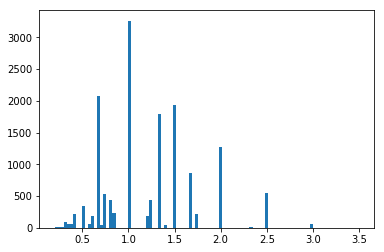

In [33]:
plt.hist(df['projects_over_time'], bins=100);

Let's look at a seaborn `pairplot` to see if we can sess out any relationships between variables.

In [35]:
df_pp_vars = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'projects_over_time']

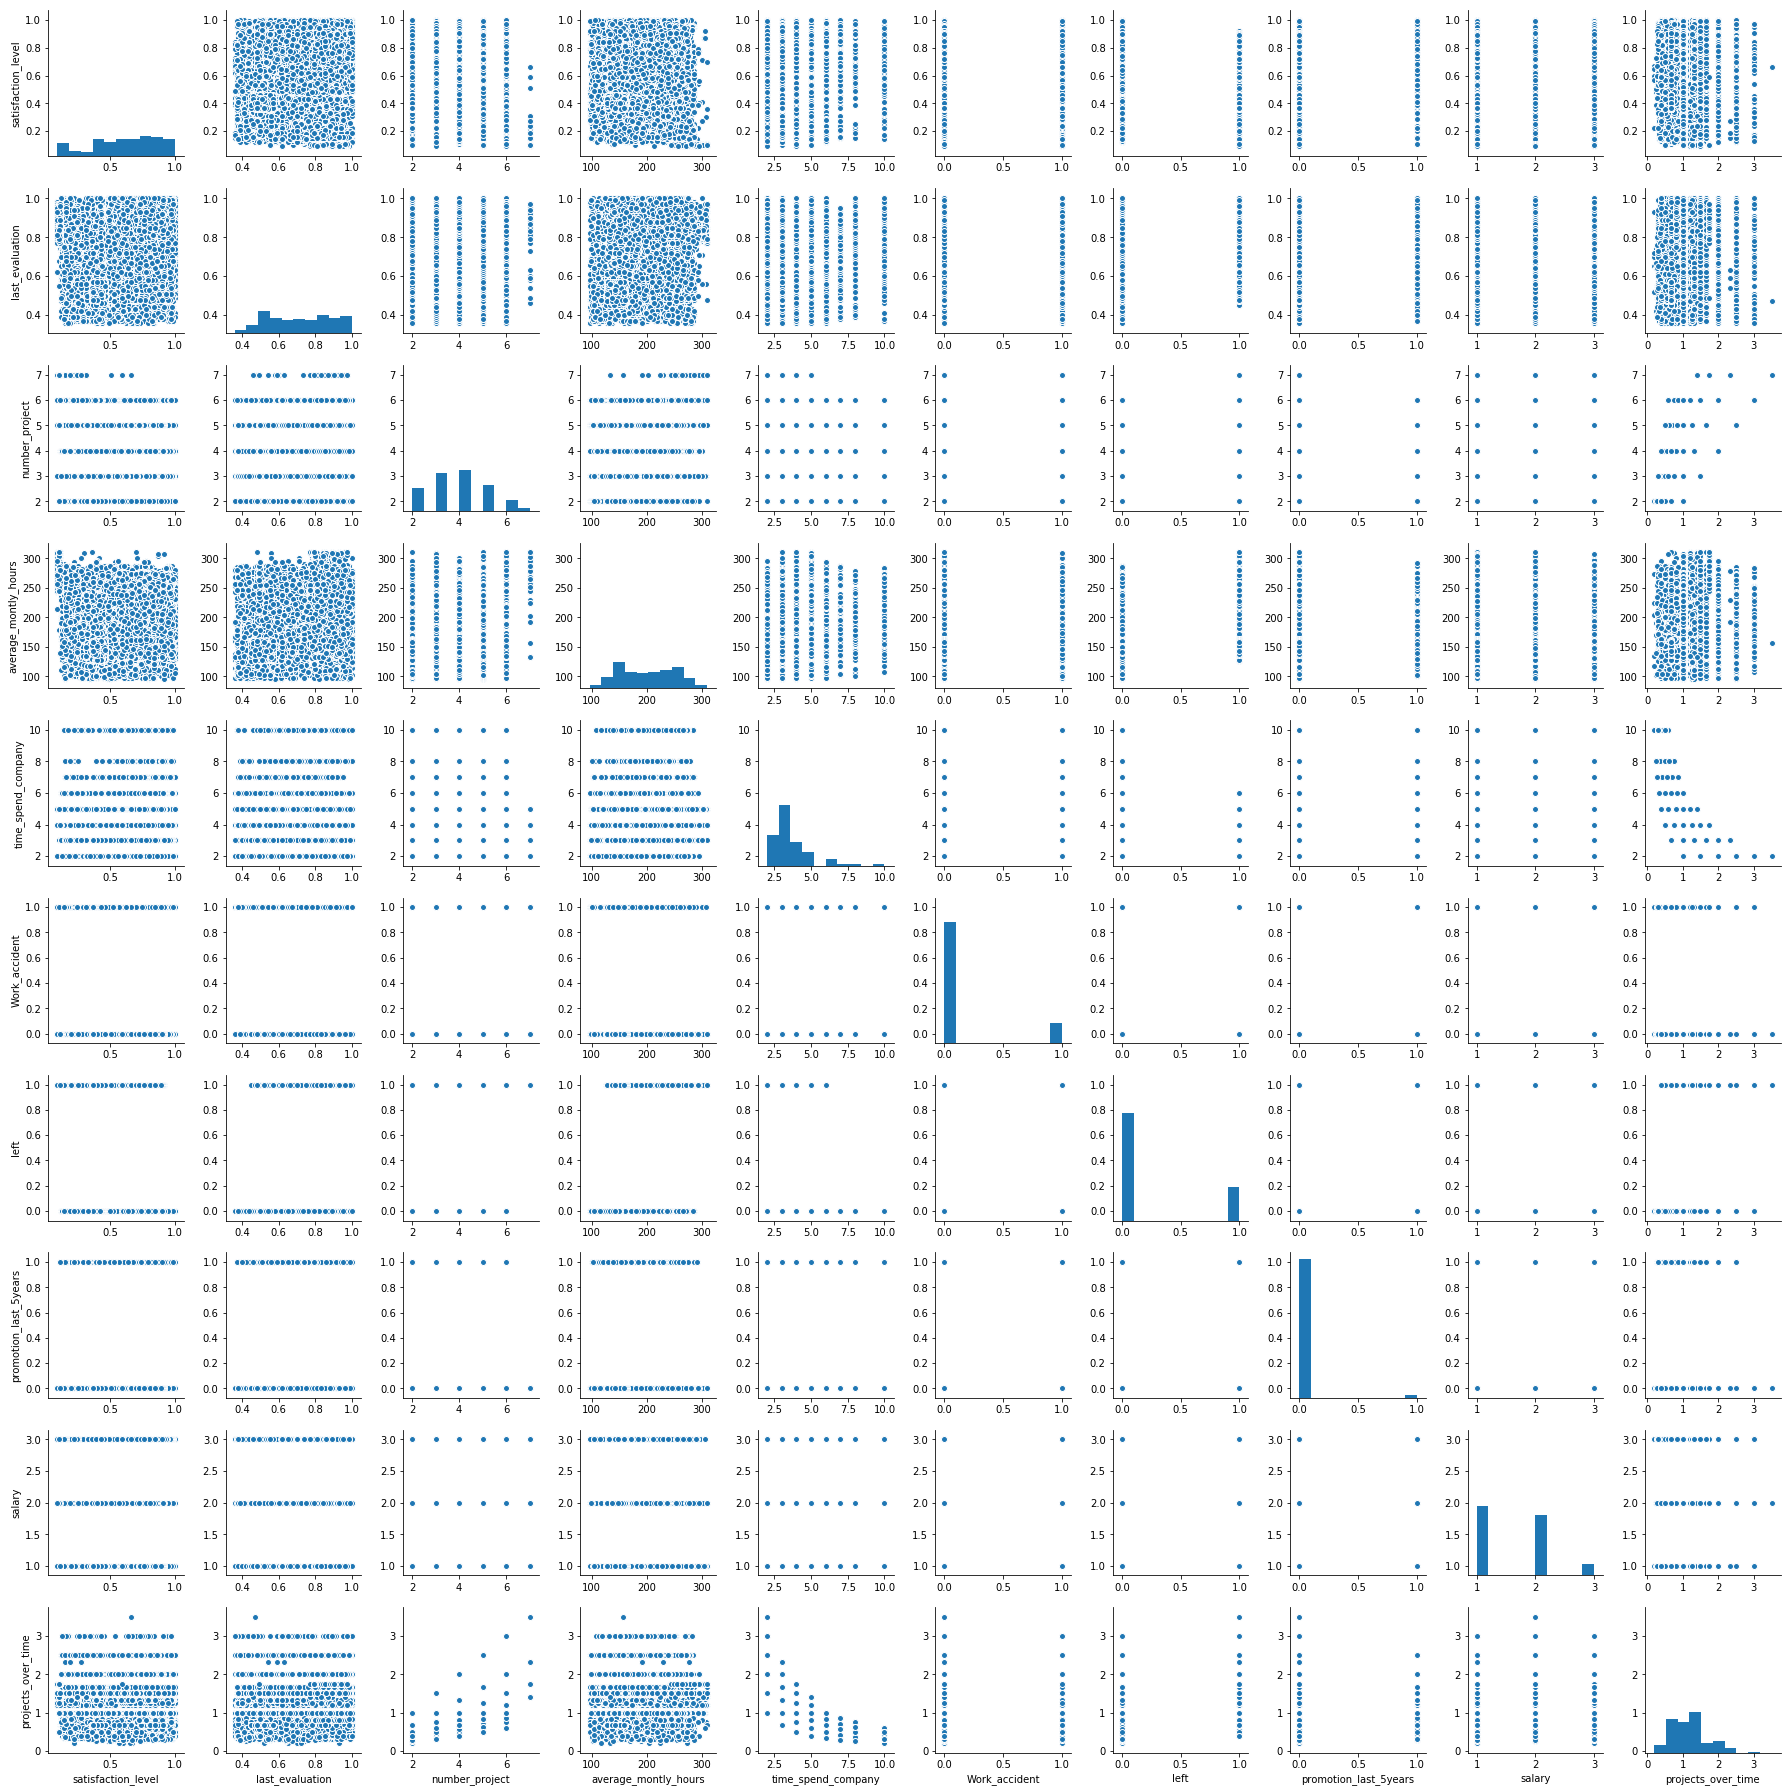

In [36]:
# Uncomment below if you want to see this, otherwise it takes half a minute or so to run
#sns.pairplot(df[df_pp_vars])

I'm not seeing anything here.

Let's try other feature engineering: `salary` and `average_montly_hours` might have a meaningful relationship. Since we don't have actual salaries and just something like a salary tier (1,2,3), let's try multiplying the two.

In [37]:
df['approx_earned'] = df['salary']*df['average_montly_hours']

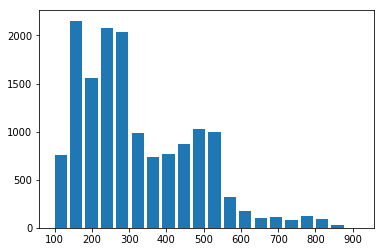

In [38]:
plt.hist(df['approx_earned'], bins=20, rwidth=0.8);

Let's also quickly correct that name `average_montly_hours` and `time_spend_company`...

In [39]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned'],
      dtype='object')

In [40]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned']

Let's explore multiplying `satisfaction_level` and `time_spent_company`. My guess is a higher satisfaction at a longer time spent means more than a higher satisfaction at a short time spent.

In [41]:
df['satisfaction_ot'] = df['satisfaction_level']*df['time_spent_company']

(array([ 1233.,  1851.,  3436.,  2672.,  1923.,  1439.,   450.,   726.,
          530.,   221.,   170.,   124.,    52.,    52.,    30.,    32.,
            6.,    10.,    14.,    28.]),
 array([ 0.18 ,  0.666,  1.152,  1.638,  2.124,  2.61 ,  3.096,  3.582,
         4.068,  4.554,  5.04 ,  5.526,  6.012,  6.498,  6.984,  7.47 ,
         7.956,  8.442,  8.928,  9.414,  9.9  ]),
 <a list of 20 Patch objects>)

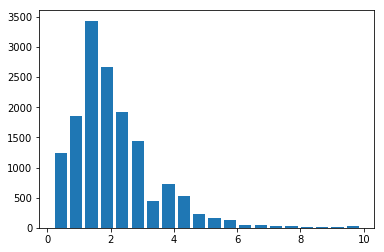

In [42]:
plt.hist(df['satisfaction_ot'], bins=20, rwidth=0.8)

I'm also thinking that there could be a way to shift the satisfaction level so that 0.5 = 0, and so we see disatisfaction as a negative value and satisfaction as a positive value. Then we could increase or decrease satisfaction more or less based on the time spent (for example: a 7 years employee satisfaction level of 0.7 means more than a 1 year employee satisfaction level of 0.7).

On that note, we can just make a simple binary (boolean) feature of `satisfied`, using the same 0.5 baseline as noted above:

In [43]:
df['satisfied'] = df['satisfaction_level'] > 0.5

In [44]:
df['satisfied'].value_counts()

True     10187
False     4812
Name: satisfied, dtype: int64

In [45]:
#pd.crosstab(df,['satisfied','left'])

left_satisfied = pd.crosstab(index=df["left"], 
                                columns=df["satisfied"])

left_satisfied.index = ["left","stayed"]

left_satisfied.columns = ['not satisfied', 'satisfied']

left_satisfied

,not satisfied,satisfied
left,2262,9166
stayed,2550,1021


Let's look at relationship between `satisfied` and `salary` in a crosstab.

In [46]:
satisfied_salary = pd.crosstab(index=df['salary'], columns=df['satisfied'])
satisfied_salary.columns = ['not satisfied', 'satisfied']
satisfied_salary.index = ['low','medium','high']
satisfied_salary['satisfied_percent'] = satisfied_salary['satisfied'] / (
                                        satisfied_salary['satisfied'] + 
                                        satisfied_salary['not satisfied'] )
satisfied_salary

,not satisfied,satisfied,satisfied_percent
low,2560,4756,0.650082
medium,1930,4516,0.700590
high,322,915,0.739693


So there appears to be a positive correlation between job satisfaction and salary tier.

Let's look at the relationship between job department and retention.

In [200]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned', 'satisfaction_ot', 'satisfied'],
      dtype='object')

In [234]:
dept_left = pd.crosstab(columns=df['dept_IT'], index=df['left'])
dept_left.index = ['not left','left']
dept_left.columns = ['other', 'IT']
dept_left

,other,IT
not left,10474,954
left,3298,273


In [235]:
newdf = pd.crosstab(columns=df['dept_RandD'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not RandD', 'RandD']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not RandD', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['RandD']
dept_left

,other,IT,RandD
not left,9808,954,666
left,3177,273,121


In [236]:
newdf = pd.crosstab(columns=df['dept_accounting'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not accounting', 'accounting']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not accounting', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['accounting']
dept_left

,other,IT,RandD,accounting
not left,9245,954,666,563
left,2973,273,121,204


In [237]:
newdf = pd.crosstab(columns=df['dept_hr'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not hr', 'hr']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not hr', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['hr']
dept_left

,other,IT,RandD,accounting,hr
not left,8721,954,666,563,524
left,2758,273,121,204,215


In [238]:
newdf = pd.crosstab(columns=df['dept_management'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not management', 'management']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not management', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['management']
dept_left

,other,IT,RandD,accounting,hr,management
not left,8182,954,666,563,524,539
left,2667,273,121,204,215,91


In [239]:
newdf = pd.crosstab(columns=df['dept_marketing'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not marketing', 'marketing']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not marketing', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['marketing']
dept_left

,other,IT,RandD,accounting,hr,management,marketing
not left,7527,954,666,563,524,539,655
left,2464,273,121,204,215,91,203


In [240]:
newdf = pd.crosstab(columns=df['dept_product_mng'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not product_mng', 'product_mng']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not product_mng', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['product_mng']
dept_left

,other,IT,RandD,accounting,hr,management,marketing,product_mng
not left,6823,954,666,563,524,539,655,704
left,2266,273,121,204,215,91,203,198


In [241]:
newdf = pd.crosstab(columns=df['dept_sales'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not sales', 'sales']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not sales', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['sales']
dept_left

,other,IT,RandD,accounting,hr,management,marketing,product_mng,sales
not left,3697,954,666,563,524,539,655,704,3126
left,1252,273,121,204,215,91,203,198,1014


In [242]:
newdf = pd.crosstab(columns=df['dept_support'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not support', 'support']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not support', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['support']
dept_left

,other,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support
not left,2023,954,666,563,524,539,655,704,3126,1674
left,697,273,121,204,215,91,203,198,1014,555


In [243]:
newdf = pd.crosstab(columns=df['dept_technical'], index=df['left'])
newdf.index = ['not left','left']
newdf.columns = ['not technical', 'technical']
dept_left = pd.concat([dept_left, newdf], axis=1)
dept_left.drop('not technical', axis=1, inplace=True)
dept_left['other'] = dept_left['other'] - dept_left['technical']
dept_left

,other,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
not left,0,954,666,563,524,539,655,704,3126,1674,2023
left,0,273,121,204,215,91,203,198,1014,555,697


In [244]:
dept_left.drop('other', axis=1, inplace=True)
dept_left = dept_left.T
dept_left

,not left,left
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555
technical,2023,697


In [245]:
dept_left['percent left'] = dept_left['left'] / (dept_left['not left'] + dept_left['left'])
dept_left

,not left,left,percent left
IT,954,273,0.222494
RandD,666,121,0.153748
accounting,563,204,0.265971
hr,524,215,0.290934
management,539,91,0.144444
marketing,655,203,0.236597
product_mng,704,198,0.219512
sales,3126,1014,0.244928
support,1674,555,0.248991
technical,2023,697,0.256250


In [248]:
dept_left.sort_values(['percent left'], axis=0, inplace=True)
dept_left

,not left,left,percent left
management,539,91,0.144444
RandD,666,121,0.153748
product_mng,704,198,0.219512
IT,954,273,0.222494
marketing,655,203,0.236597
sales,3126,1014,0.244928
support,1674,555,0.248991
technical,2023,697,0.256250
accounting,563,204,0.265971
hr,524,215,0.290934


In [249]:
dept_left['retention'] = 1 - dept_left['percent left']
dept_left

,not left,left,percent left,retention
management,539,91,0.144444,0.855556
RandD,666,121,0.153748,0.846252
product_mng,704,198,0.219512,0.780488
IT,954,273,0.222494,0.777506
marketing,655,203,0.236597,0.763403
sales,3126,1014,0.244928,0.755072
support,1674,555,0.248991,0.751009
technical,2023,697,0.256250,0.743750
accounting,563,204,0.265971,0.734029
hr,524,215,0.290934,0.709066


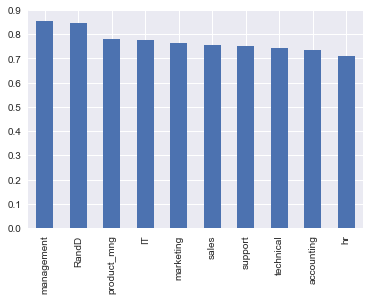

In [253]:
dept_left['retention'].plot.bar();

At this point, I'll pause the feature engineering/data exploration for a little bit to start doing some modeling. Here are some other features from which I want to explore relationships later (but not limited to):  
* time spent + hours worked
* time spent + salary
* promotion + time spent
* 

## Modeling

Models:  
* [Logistic Regression](#Logistic-Regression)
* [K-Nearest Neighbors](#K-Nearest-Neighbors)
* [Random Forest Classifiers](#Random-Forest-Classifier)

In [172]:
# imports

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import log_loss
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import classification_report



In [47]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned', 'satisfaction_ot', 'satisfied'],
      dtype='object')

In [52]:
# Creating train and test sets

X, y = df.drop(['left'], axis=1), df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
print(len(X_train))
print(len(X_test))

10499
4500


### Logistic Regression

Let's try some logistic models. First, "out-of-the-box" model:

In [98]:
# Instantiate and fit the model with train sets
log01 = LogisticRegression()
log01.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
# Predict on test X set
y_pred_log01 = log01.predict(X_test)
# If we just guess that they don't leave, this is our accuracy: <-- first baseline
print("Mean not 'left':", 1-df['left'].mean())
# Now we compare what we predicted to what the actual is <-- accuracy score
print("Accuracy score:", accuracy_score(y_test, y_pred_log01))
print("Precision score:", precision_score(y_test, y_pred_log01))
print("Recall score:", recall_score(y_test, y_pred_log01))

Mean not 'left': 0.761917461164
Accuracy score: 0.904222222222
Precision score: 0.781391147245
Recall score: 0.820683111954


That's pretty high accuracy, decent precision, and decent recall. All three beat the baseline of just assuming everyone stays. Assuming we want to minimize false negatives (we want to catch as many cases of people who have high chances of leaving as we can), we probably want to improve on recall more than we want to improve precision or accuracy.

However, let's look at the coefficients made here:

In [100]:
# Function for outputting a logistic regression coefficients prepended by the column name

def print_coefficients(Xcols, coefs):
    maxlen = max([len(feature) for feature in Xcols])
    tablen = 8
    for i in range(len(Xcols)):
        lendeficit = maxlen - len(Xcols[i])
        num_tabs = int(lendeficit/(tablen)) + 1
        #print(lendeficit,num_tabs)
        if (lendeficit+1) % 8 == 0:
            num_tabs += 1
        tabs = '\t' * num_tabs
        print(Xcols[i],tabs,coefs[:,i])
        
# maxlen = max([len(feature) for feature in X.columns])
# tablen = 8
# for i in range(len(X.columns)):
#     lendeficit = maxlen - len(X.columns[i])
#     num_tabs = int(lendeficit/(tablen)) + 1
#     #print(lendeficit,num_tabs)
#     if (lendeficit+1) % 8 == 0:
#         num_tabs += 1
#     tabs = '\t' * num_tabs
#     print(X.columns[i],tabs,logmodel01.coef_[:,i])

In [101]:
print_coefficients(X.columns, log01.coef_)

satisfaction_level 	 [-9.24746651]
last_evaluation 	 [ 2.13647831]
number_project 		 [ 2.59268849]
average_monthly_hours 	 [ 0.01339029]
time_spent_company 	 [-3.6844356]
Work_accident 		 [-1.39614632]
promotion_last_5years 	 [-0.77037101]
salary 			 [-0.06723064]
dept_IT 		 [ 1.07811381]
dept_RandD 		 [ 0.48859675]
dept_accounting 	 [ 1.08905467]
dept_hr 		 [ 1.28498461]
dept_management 	 [ 0.78332193]
dept_marketing 		 [ 1.14125771]
dept_product_mng 	 [ 0.90790168]
dept_sales 		 [ 1.17718372]
dept_support 		 [ 1.25372725]
dept_technical 		 [ 1.27622098]
projects_over_time 	 [-10.50136871]
approx_earned 		 [-0.0024618]
satisfaction_ot 	 [ 2.76200557]
satisfied 		 [-3.20185856]


Interestingly, `projects_over_time` appears to have the largest impact: a -10 coefficient implies that a person who's done a lot of projects over time has higher employee retention rate (busy-bodies stick around it seems). However, the number of projects (`number_project`) is positively correlated with leaving. `average_monthly_hours`, `salary`, and `approx_earned` seems to have very little impact.

In [102]:
y_predproba_log01_mat = log01.predict_proba(X_test)
y_predproba_log01 = y_predproba_log01_mat[:,1]

In [103]:
def plot_bisect():
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

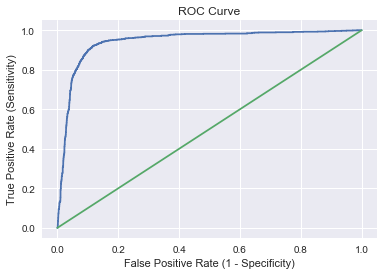

In [117]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_predproba_log01)
plt.plot(fpr,tpr)
plot_bisect()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)');

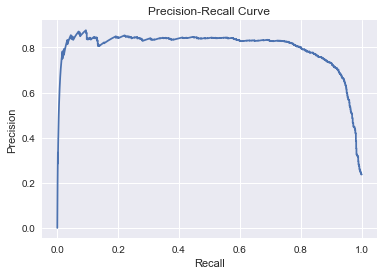

In [118]:
# Precision-Recall Curve

prec, recall, thresholds = precision_recall_curve(y_test, y_predproba_log01)
plt.plot(recall[0:-1], prec[0:-1])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

Looks like we want our recall to be around that low 90%s. For that, we need to find the threshold...

In [135]:
thresh = 0.3

y_predthresh_log01 = y_predproba_log01 > thresh
print("Precision score:", precision_score(y_test, y_predthresh_log01))
print("Recall score:", recall_score(y_test, y_predthresh_log01))

Precision score: 0.68851303735
Recall score: 0.926944971537


In [144]:
best_thresh = 0.0
best_sum = 0

iterations = 1000
y_predproba = y_predproba_log01

for i in range(iterations):
    thresh = i/iterations
    y_predthresh = y_predproba > thresh
    current_sum = precision_score(y_test, y_predthresh) + recall_score(y_test, y_predthresh)
    if (current_sum > best_sum) and (recall_score(y_test, y_predthresh) > 0.9204):
    #if (current_sum > best_sum):
        best_sum = current_sum
        best_thresh = thresh

print('Best threshold:', best_thresh)
y_predthresh_log01 = y_predproba_log01 > best_thresh
print("Precision score:", precision_score(y_test, y_predthresh_log01))
print("Recall score:", recall_score(y_test, y_predthresh_log01))

Best threshold: 0.316
Precision score: 0.701223902088
Recall score: 0.924098671727


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


So we'll probably set the threshold to around 0.316 to get a high recall (>92%), and not lose too much out on precision (>70%).

### K-Nearest Neighbors  
Let's try some KNNs.

In [146]:
knn01 = KNeighborsClassifier(n_neighbors=1)
knn01.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [149]:
y_predproba_knn01_mat = knn01.predict_proba(X_test)
y_predproba_knn01 = y_predproba_knn01_mat[:,1]

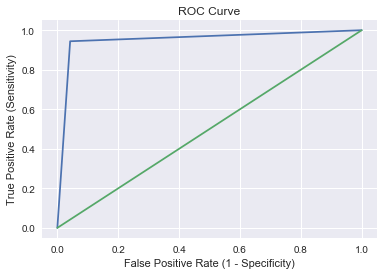

In [150]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predproba_knn01)
plt.plot(fpr,tpr)
plot_bisect()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)');

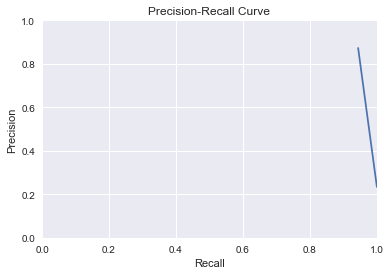

In [154]:
# Precision-Recall Curve
prec, recall, thresholds = precision_recall_curve(y_test, y_predproba_knn01)
plt.plot(recall[0:-1], prec[0:-1])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,1)
plt.ylim(0,1);

In [165]:
thresh = 0.

y_predthresh_knn01 = y_predproba_knn01 > thresh
print("Precision score:", precision_score(y_test, y_predthresh_knn01))
print("Recall score:", recall_score(y_test, y_predthresh_knn01))

Precision score: 0.872807017544
Recall score: 0.944022770398


In [166]:
knn02 = KNeighborsClassifier(n_neighbors=5)
knn02.fit(X_train,y_train)
y_predproba_knn02_mat = knn01.predict_proba(X_test)
y_predproba_knn02 = y_predproba_knn02_mat[:,1]

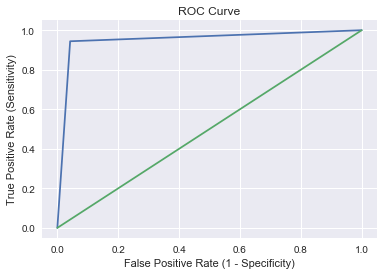

In [167]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_predproba_knn02)
plt.plot(fpr,tpr)
plot_bisect()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)');

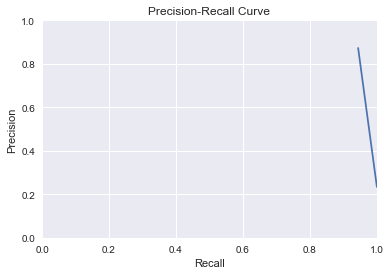

In [168]:
# Precision-Recall Curve
prec, recall, thresholds = precision_recall_curve(y_test, y_predproba_knn02)
plt.plot(recall[0:-1], prec[0:-1])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,1)
plt.ylim(0,1);

In [171]:
best_k = 1
best_acc = 0.5

for i in range(20):
    k = i+1
    
    knnk = KNeighborsClassifier(n_neighbors=k)
    
    current = cross_val_score(knnk, X, y, cv=10, scoring='accuracy')
    current = current.max()
    
    if current > best_acc:
        best_acc = current
        best_k = k
        
print(best_k, best_acc)

1 1.0


### Random Forest Classifier  
Let's try some random forests. First, one 'out-of-the-box'.

In [174]:
rfc01 = RandomForestClassifier()
rfc01.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
y_pred_rfc01 = rfc01.predict(X_test)
print("Mean not 'left':", 1-df['left'].mean())
print("Accuracy score:", accuracy_score(y_test, y_pred_rfc01))
print("Precision score:", precision_score(y_test, y_pred_rfc01))
print("Recall score:", recall_score(y_test, y_pred_rfc01))

Mean not 'left': 0.761917461164
Accuracy score: 0.989333333333
Precision score: 0.994106090373
Recall score: 0.960151802657


Pretty good scores all around, though let's see if we can improve that recall score.

In [184]:
# These hyperparameters were tested one-by-one until the best from each category was found.
elements = [50,55,57,59,61,63,65] #estimators = 55

best_e = elements[0]
best_recall = 0

for e in elements:
    rfc02 = RandomForestClassifier(n_estimators = e)
    rfc02.fit(X_test, y_test)
    y_pred_rfc02 = rfc02.predict(X_test)
    #print("Accuracy score:", accuracy_score(y_test, y_pred_rfc02))
    #print("Precision score:", precision_score(y_test, y_pred_rfc02))
    recall_rfc02 = recall_score(y_test, y_pred_rfc02)
    print('Element:', e)
    print("Recall score:", recall_rfc02)
    
    if recall_rfc02 > best_recall:
        best_e = e
        best_recall = recall_rfc02
    
print('Best:', best_e)
rfc02 = RandomForestClassifier(n_estimators = best_e)
rfc02.fit(X_test, y_test)

Element: 50
Recall score: 0.998102466793
Element: 55
Recall score: 1.0
Element: 57
Recall score: 0.999051233397
Element: 59
Recall score: 1.0
Element: 61
Recall score: 0.999051233397
Element: 63
Recall score: 1.0
Element: 65
Recall score: 1.0
Best: 55


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

It looks like we can get perfect recall with not much tinkering? I'm a little flummoxed. This is a stimulated dataset, but a pretty simple random forest model seems too effective.

In [187]:
def print_importances(Xcols, rfc02)

rfc02.feature_importances_

array([ 0.21548326,  0.08472436,  0.11649816,  0.08658099,  0.10913869,
        0.00517232,  0.00142954,  0.0083085 ,  0.00131703,  0.00122961,
        0.00138692,  0.0021565 ,  0.00076436,  0.00059013,  0.00091152,
        0.00307734,  0.00268482,  0.00249801,  0.08520692,  0.04480514,
        0.1628787 ,  0.06315719])

In [ ]:
print_importances(X.columns, rfc02.feature_importances_)

In [193]:
feature_importances = pd.DataFrame()
feature_importances['names'] = X.columns
feature_importances['feature importances'] = rfc02.feature_importances_
feature_importances.sort_values(['feature importances'],ascending=False,inplace=True)
feature_importances.reset_index(drop=True,inplace=True)
feature_importances

,names,feature importances
0,satisfaction_level,0.215483
1,satisfaction_ot,0.162879
2,number_project,0.116498
3,time_spent_company,0.109139
4,average_monthly_hours,0.086581
5,projects_over_time,0.085207
6,last_evaluation,0.084724
7,satisfied,0.063157
8,approx_earned,0.044805
9,salary,0.008308


Let's close this model out by looking at the rfc02 model through ml_insights's ice plots.

In [195]:
#imports

import ml_insights as mli

In [197]:
mxr_rfc02 = mli.ModelXRay(rfc02,X_test)

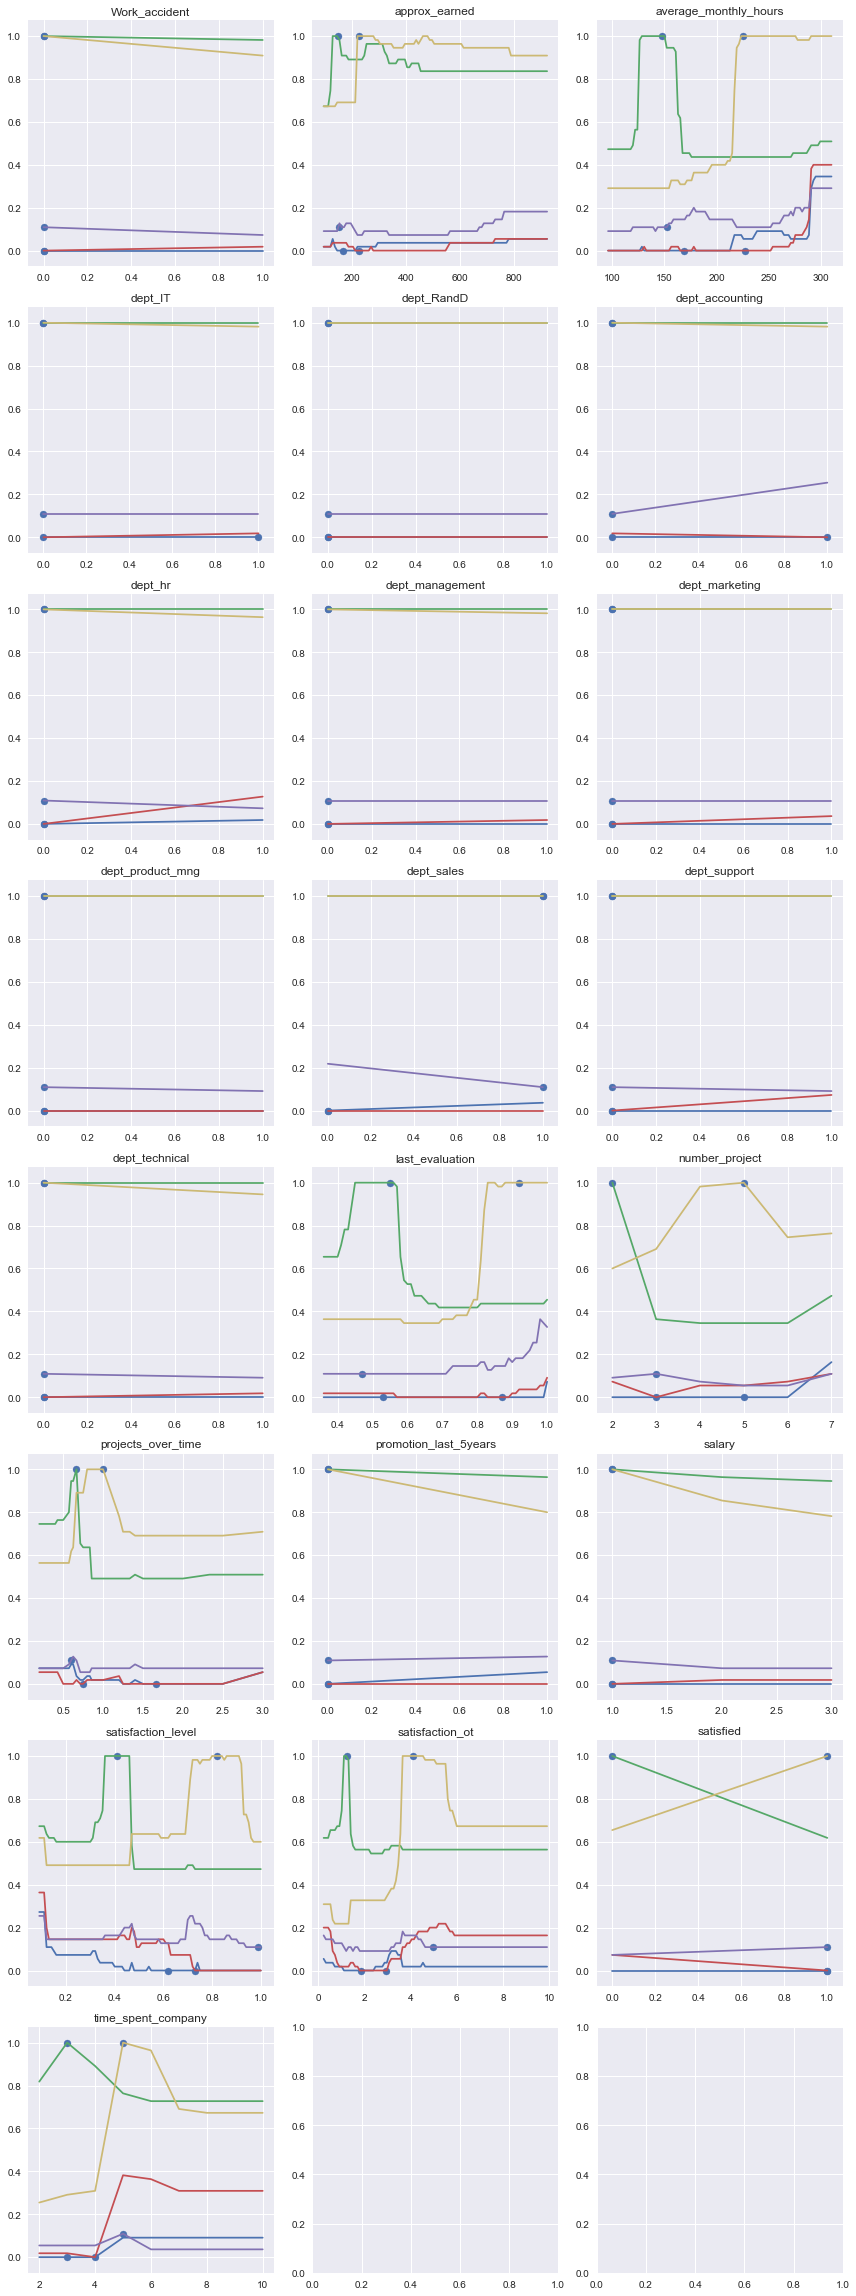

In [199]:
indices_rfc02 = mxr_rfc02.feature_dependence_plots(num_pts=5)